# Markowitz Efficient Frontier in Python

In [107]:
# needed libraries:
import numpy as np #numpy to work with matrices and vectors
import matplotlib.pyplot as plt # use matplotlib library for drawing

# Part 1: Example for 2 assets

In [108]:
# assume 2 assets: low risk asset and high risk asset
M=2
# inputs: returns, volatilities, correlation coefficient
returns_input = np.array([0.04,0.06])
volas_input = np.array([0.06,0.10])
corr_coef_input = 0

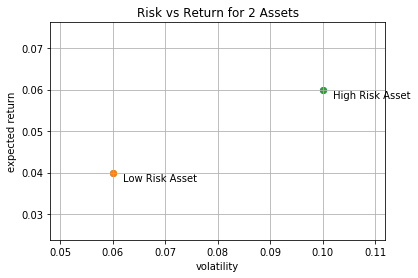

In [109]:
# draw risk and return on the graph
plt.scatter(volas_input, returns_input)
plt.xlabel('volatility')
plt.ylabel('expected return')
plt.grid(True)
plt.title('Risk vs Return for {} Assets'.format(M))

plt.types = ['Low Risk Asset','High Risk Asset']
for i, type in enumerate(plt.types):
    x = volas_input[i]
    y = returns_input[i]
    plt.scatter(x,y)
    plt.text(x+0.002, y-0.002, type, fontsize = 10)

plt.show()


In [110]:
def covariance(corr_coef, volas):
    if len(volas) == 2:
        corr = np.array([[1, corr_coef],[corr_coef, 1]]) ### assume corr coef is zero!
    else:
        print('inputs do not correspond to the 2-asset-case')
    cov = np.diag(volas) @ corr @ np.diag(volas)
    return cov

In [111]:
# define functions to calculate portfolio return and volatility given the weights for N different portfolios and 2 assets 
def calc_return(w,returns):
    # Nx2 and 2x1 --> Nx1
    return w @ returns.T

def calc_vola(w,cov):
    # Nx2 and 2x2 and 2xN --> need Nx1
    volas = np.zeros(np.shape(w)[0])
    if w.ndim == 1:
        volas = np.sqrt(w @ cov @ w.T)
    else:    
        for i in range(0,np.shape(w)[0]):
            volas[i] = np.sqrt(w[i,:] @ cov @ w[i,:].T)
    return volas

In [112]:
def efffrontier(returns, cov, N):
    #analytical solution, 2 assets case
    
    w1 = np.linspace(0, 1, num=N)
    w2 = 1-w1
    w = np.array([w1,w2]).T
    pf_ret_eff = calc_return(w,returns_input)
    pf_ret_eff
    pf_vol_eff = calc_vola(w,cov_input)
    pf_vol_eff

    return pf_ret_eff, pf_vol_eff

# Case 1. Correlation Coefficient is 0

In [113]:
corr_coef_input = 0

In [114]:
cov_input = covariance(corr_coef_input, volas_input)

## Efficient Frontier

In [115]:
N=100 # grid size of the eff frontier
y,x = efffrontier(returns_input, cov_input, N) 

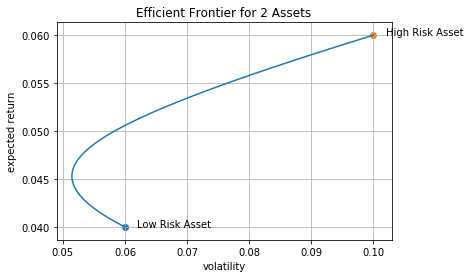

In [116]:
plt.plot(x,y)

plt.xlabel('volatility')
plt.ylabel('expected return')
plt.title('Efficient Frontier for {} Assets'.format(M))
plt.grid(True)

#plt.scatter(volas_input, returns_input)
plt.types = ['Low Risk Asset','High Risk Asset']
for i, type in enumerate(plt.types):
    x2 = volas_input[i]
    y2 = returns_input[i]
    plt.scatter(x2,y2)
    plt.text(x2+0.002, y2-0.00, type, fontsize = 10)
    
plt.show()

## Minimum Variance Portfolio (corr = 0)

In [117]:
# minimum variance portfolio (analytical solution)
minvar_w = np.divide(np.linalg.inv(cov_input) @ np.ones(len(returns_input)), np.ones(len(returns_input)).T @ np.linalg.inv(cov_input) @ np.ones(len(returns_input)))
print('minimum variance portfolio is: {}'.format(minvar_w))
minvar_ret = calc_return(minvar_w, returns_input)
minvar_vol = calc_vola(minvar_w, cov_input)

minimum variance portfolio is: [0.73529412 0.26470588]


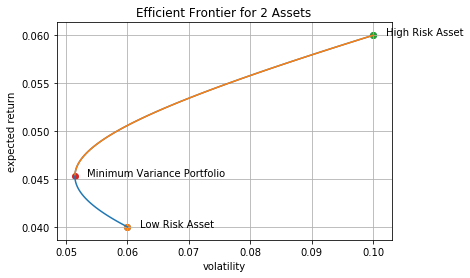

In [118]:
plt.plot(x,y)
plt.scatter(volas_input, returns_input)
plt.xlabel('volatility')
plt.ylabel('expected return')
plt.title('Efficient Frontier for {} Assets'.format(M))
plt.grid(True)

#plt.scatter(volas_input, returns_input)
plt.types = ['Low Risk Asset','High Risk Asset']
for i, type in enumerate(plt.types):
    x2 = volas_input[i]
    y2 = returns_input[i]
    plt.scatter(x2,y2)
    plt.text(x2+0.002, y2-0.00, type, fontsize = 10)
        
#minimum variance portfolio
plt.scatter(minvar_vol, minvar_ret)
plt.text(minvar_vol+0.002, minvar_ret-0.00, 'Minimum Variance Portfolio', fontsize = 10)

# efficient frontier is the upper part of the graph
returns_eff = y[y>=minvar_ret]
vol_eff = x[y>=minvar_ret]
plt.plot(vol_eff,returns_eff)


plt.show()

# Case 2. Correlation Coefficient is +1

In [120]:
# now if the correlation coefficient is [0, -1, 1]
corr_coef_input = 1

In [121]:
cov_input = covariance(corr_coef_input, volas_input)
cov_input

array([[0.0036, 0.006 ],
       [0.006 , 0.01  ]])

## Efficient Frontier

In [122]:
N=100 # grid size of the eff frontier
y,x = efffrontier(returns_input, cov_input, N) 

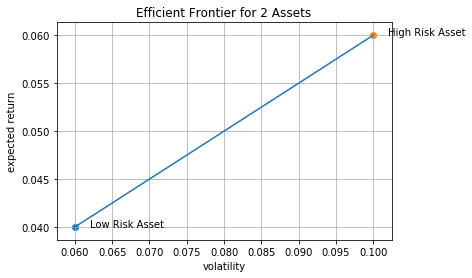

In [123]:
plt.plot(x,y)
plt.xlabel('volatility')
plt.ylabel('expected return')
plt.title('Efficient Frontier for {} Assets'.format(M))
plt.grid(True)

#plt.scatter(volas_input, returns_input)
plt.types = ['Low Risk Asset','High Risk Asset']
for i, type in enumerate(plt.types):
    x2 = volas_input[i]
    y2 = returns_input[i]
    plt.scatter(x2,y2)
    plt.text(x2+0.002, y2-0.00, type, fontsize = 10)
    
plt.show()

## Minimum Variance Portfolio (corr = +1)

In [124]:
minvar_w = np.divide(np.linalg.inv(cov_input) @ np.ones(len(returns_input)), np.ones(len(returns_input)).T @ np.linalg.inv(cov_input) @ np.ones(len(returns_input)))
minvar_ret = calc_return(minvar_w, returns_input)
minvar_vol = calc_vola(minvar_w, cov_input)
print('minimum variance portfolio is: {}'.format(minvar_w))

minimum variance portfolio is: [ 2.5 -1.5]


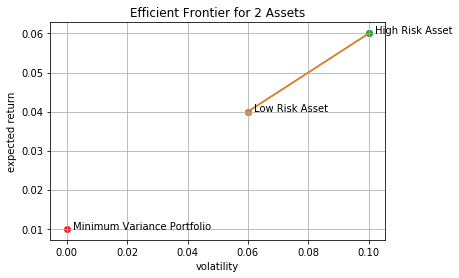

In [125]:

plt.plot(x,y)
plt.scatter(volas_input, returns_input)
plt.xlabel('volatility')
plt.ylabel('expected return')
plt.title('Efficient Frontier for {} Assets'.format(M))
plt.grid(True)

#plt.scatter(volas_input, returns_input)
plt.types = ['Low Risk Asset','High Risk Asset']
for i, type in enumerate(plt.types):
    x2 = volas_input[i]
    y2 = returns_input[i]
    plt.scatter(x2,y2)
    plt.text(x2+0.002, y2-0.00, type, fontsize = 10)
        
#minimum variance portfolio
plt.scatter(minvar_vol, minvar_ret)
plt.text(minvar_vol+0.002, minvar_ret-0.00, 'Minimum Variance Portfolio', fontsize = 10)

# efficient frontier is the upper part of the graph
returns_eff = y[y>=minvar_ret]
vol_eff = x[y>=minvar_ret]
plt.plot(vol_eff,returns_eff)


plt.show()

# Case 3. Correlation Coefficient is -1

In [93]:
# now if the correlation coefficient is [0, -1, 1]
corr_coef_input = - 1

In [94]:
cov_input = covariance(corr_coef_input, volas_input)

## Efficient Frontier

In [95]:
N=100 # grid size of the eff frontier
y,x = efffrontier(returns_input, cov_input, N) 

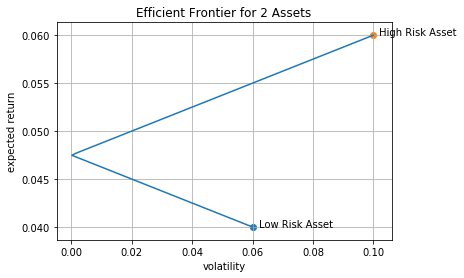

In [96]:
plt.plot(x,y)
plt.xlabel('volatility')
plt.ylabel('expected return')
plt.title('Efficient Frontier for {} Assets'.format(M))
plt.grid(True)

#plt.scatter(volas_input, returns_input)
plt.types = ['Low Risk Asset','High Risk Asset']
for i, type in enumerate(plt.types):
    x2 = volas_input[i]
    y2 = returns_input[i]
    plt.scatter(x2,y2)
    plt.text(x2+0.002, y2-0.00, type, fontsize = 10)
    
plt.show()

## Minimum Variance Portfolio (corr = -1)

In [97]:
minvar_w = np.divide(np.linalg.inv(cov_input) @ np.ones(len(returns_input)), np.ones(len(returns_input)).T @ np.linalg.inv(cov_input) @ np.ones(len(returns_input)))
minvar_ret = calc_return(minvar_w, returns_input)
minvar_vol = calc_vola(minvar_w, cov_input)
print('minimum variance portfolio is: {}'.format(minvar_w))

minimum variance portfolio is: [0.625 0.375]


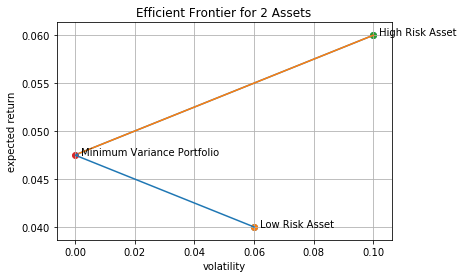

In [98]:
plt.plot(x,y)
plt.scatter(volas_input, returns_input)
plt.xlabel('volatility')
plt.ylabel('expected return')
plt.title('Efficient Frontier for {} Assets'.format(M))
plt.grid(True)

#plt.scatter(volas_input, returns_input)
plt.types = ['Low Risk Asset','High Risk Asset']
for i, type in enumerate(plt.types):
    x2 = volas_input[i]
    y2 = returns_input[i]
    plt.scatter(x2,y2)
    plt.text(x2+0.002, y2-0.00, type, fontsize = 10)
        
#minimum variance portfolio
plt.scatter(minvar_vol, minvar_ret)
plt.text(minvar_vol+0.002, minvar_ret-0.00, 'Minimum Variance Portfolio', fontsize = 10)

# efficient frontier is the upper part of the graph
returns_eff = y[y>=minvar_ret]
vol_eff = x[y>=minvar_ret]
plt.plot(vol_eff,returns_eff)


plt.show()

# BOKEH

In [99]:
# plot the same thing in bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

# output to static HTML file
#output_file("markowitz.html")
output_notebook()

# create a new plot
p = figure(
   tools="pan,box_zoom,reset,save",
   title="Efficient frontier for 2 assets",
   x_axis_label='volatility', y_axis_label='return'
)

# add some renderers
p.line(x,y)
#p.circle(x, volas, legend="y=x", fill_color="white", size=8)

# show the results
show(p)

Loading BokehJS ...

# Part 2: Example for M=3 assets (Matrix form)

In [100]:
# in future generalize to M assets
M=3
returns_input = np.random.rand(M)
volas_input = np.random.rand(M)

In [101]:
# create a covariance matrix out of volatilities and a correlation coefficient (correlation matrix)
def covariance(corr_coef, volas):
    if len(volas) > 2:
        corr = np.array([[1, corr_coef],[corr_coef, 1]]) ### assume corr coef is zero!
    else:
        print('inputs do not correspond to the M>2-assets-case')
    cov = np.diag(volas) @ corr @ np.diag(volas)
    return cov

In [102]:
# define functions to calculate portfolio return and volatility given the weights for N different portfolios and M assets 
def calc_return(w,returns):
    return w @ returns.T

def calc_vola(w,cov):
    volas = np.zeros(np.shape(w)[0])
    if w.ndim == 1:
        volas = np.sqrt(w @ cov @ w.T)
    else:    
        for i in range(0,np.shape(w)[0]):
            volas[i] = np.sqrt(w[i,:] @ cov @ w[i,:].T)
    return volas

In [103]:
def efffrontier(returns, cov, N):
    #analytical solution, matrix case
    A = np.array(returns).T @ np.linalg.inv(cov) @ np.ones(len(returns))
    B = np.array(returns).T @ np.linalg.inv(cov) @ np.array(returns)
    C = np.ones(len(returns)).T @ np.linalg.inv(cov) @ np.ones(len(returns))
    D = B * C - A**2
    
    #for given return find minimum riks (vol)
    pf_ret_eff = np.linspace(min(returns), max(returns), num=N)
    pf_vol_eff = np.sqrt(1/D * (C * np.multiply(pf_ret_eff, pf_ret_eff) - 2 * A * pf_ret_eff + B))

    return pf_ret_eff, pf_vol_eff

# Case 1. Correlation coefficient is 0 among all assets

In [104]:
corr_coef_input = 0

In [105]:
cov_input = covariance(corr_coef_input, volas_input)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

# Case 2. Correlation coefficient is +1 among all assets

# Case 3. Correlation coefficient is -1 among all assets

# Case 4. Correlation coefficient is different among all assets